In [2]:
import numpy as np


Проведем теститрование функции smape , которая вычисляет метрику smape по формуле

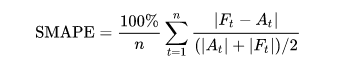

# Текущая реализация функции

In [32]:
def smape(true: list, pred: list) -> float:
    """
    Calculate SMAPE.

    Parameters
    ----------
    true : list
        True labels
    pred : list
        Prediction values

    Returns
    -------
    float
        SMAPE metric
    """
    numerator = 0
    denominator = 0

    for i in range(len(true)):
        numerator += abs(true[i] - pred[i])
        denominator += abs(true[i]) + abs(pred[i])

    return 2 * numerator / denominator * 100


Функция принимает на входе два массива  и на выходе вычисляет метрику SMAPE.

Пример:

In [34]:
a = np.array((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))
b = np.array((0, 2, 4, 5, 7, 8, 9, 0, 12, 23))
print(smape(a, b))


67.82608695652173


# Тестовая функция в Hypotesis

In [12]:
import numpy as np
from hypothesis import given
from hypothesis.extra import numpy
from hypothesis.strategies import integers


In [35]:
size = integers(min_value=0, max_value=10)


@given(
    true=numpy.arrays(dtype=np.float32, shape=size),
    predict=numpy.arrays(dtype=np.float32, shape=size),
)
def test_smape(true, predict):
    smape_metric = smape(true, predict)
    assert not np.isnan(smape_metric)


 short test summary info \
FAILED test_smape.py::test_smape - ZeroDivisionError: division by zero


Нужно предусмотреть для функции  обработку нулевых значений

Реализуем функцию с учетом  тестов

In [38]:
def smape(true: list, pred: list) -> float:
    """
    Calculate SMAPE.

    Parameters
    ----------
    true : list
        True labels
    pred : list
        Prediction values

    Returns
    -------
    float
        SMAPE metric
    """
    numerator = 0
    denominator = 0
    count = 0

    for t, p in zip(true, pred, strict=False):
        if t is not None and p is not None:
            numerator += abs(t - p)
            denominator += abs(t) + abs(p)
            count += 1

    if denominator == 0:
        return 0.0

    return 2 * numerator / denominator * 100


В новой реализации функция учитывает обработку нулевых значений в массивах предсказанных и реальных значений

# Функция oracle тестрования

In [ ]:
@given(
    true=numpy.arrays(dtype=np.float32, shape=size),
    pred=numpy.arrays(dtype=np.float32, shape=size),
)
def test_wape_oracle(true, predict):
    wape_metric = smape(true, predict)
    wape_metric_old = smape_old(true, predict)
    assert np.isclose(wape_metric, wape_metric_old)


На этапе oracle тестирования, тест показывает, что для первой функции не выполнено условие деления на ноль